# Andy Estevez & Jordan Roman: UFC Data from 1993 to 2019 Project

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
data = pd.read_csv("C:/Users/Home/Downloads/ufcdata/data.csv", delimiter = ',')
raw_fighter_data = pd.read_csv("C:/Users/Home/Downloads/ufcdata/raw_fighter_details.csv", delimiter = ',')

In [3]:
data.head(5)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [4]:
# Size of the original data
data.shape

(5144, 145)

In [5]:
# Feature Names
print(", ".join(data.columns))

R_fighter, B_fighter, Referee, date, location, Winner, title_bout, weight_class, no_of_rounds, B_current_lose_streak, B_current_win_streak, B_draw, B_avg_BODY_att, B_avg_BODY_landed, B_avg_CLINCH_att, B_avg_CLINCH_landed, B_avg_DISTANCE_att, B_avg_DISTANCE_landed, B_avg_GROUND_att, B_avg_GROUND_landed, B_avg_HEAD_att, B_avg_HEAD_landed, B_avg_KD, B_avg_LEG_att, B_avg_LEG_landed, B_avg_PASS, B_avg_REV, B_avg_SIG_STR_att, B_avg_SIG_STR_landed, B_avg_SIG_STR_pct, B_avg_SUB_ATT, B_avg_TD_att, B_avg_TD_landed, B_avg_TD_pct, B_avg_TOTAL_STR_att, B_avg_TOTAL_STR_landed, B_longest_win_streak, B_losses, B_avg_opp_BODY_att, B_avg_opp_BODY_landed, B_avg_opp_CLINCH_att, B_avg_opp_CLINCH_landed, B_avg_opp_DISTANCE_att, B_avg_opp_DISTANCE_landed, B_avg_opp_GROUND_att, B_avg_opp_GROUND_landed, B_avg_opp_HEAD_att, B_avg_opp_HEAD_landed, B_avg_opp_KD, B_avg_opp_LEG_att, B_avg_opp_LEG_landed, B_avg_opp_PASS, B_avg_opp_REV, B_avg_opp_SIG_STR_att, B_avg_opp_SIG_STR_landed, B_avg_opp_SIG_STR_pct, B_avg_opp

In [6]:
# Data types of each feature
data.dtypes

R_fighter                        object
B_fighter                        object
Referee                          object
date                             object
location                         object
Winner                           object
title_bout                         bool
weight_class                     object
no_of_rounds                      int64
B_current_lose_streak           float64
B_current_win_streak            float64
B_draw                          float64
B_avg_BODY_att                  float64
B_avg_BODY_landed               float64
B_avg_CLINCH_att                float64
B_avg_CLINCH_landed             float64
B_avg_DISTANCE_att              float64
B_avg_DISTANCE_landed           float64
B_avg_GROUND_att                float64
B_avg_GROUND_landed             float64
B_avg_HEAD_att                  float64
B_avg_HEAD_landed               float64
B_avg_KD                        float64
B_avg_LEG_att                   float64
B_avg_LEG_landed                float64


In [7]:
data['Winner'].value_counts()

Red     3470
Blue    1591
Draw      83
Name: Winner, dtype: int64

In [8]:
# Replace Winner column with the winner of the fight
winners = []
for i in data.index:
    
    decision = data.loc[i, 'Winner']
    
    if decision == 'Draw':
        winners.append("No Contest")
    else:
        if decision == 'Red':
            fighter_name = data.loc[i, 'R_fighter']

        elif decision == 'Blue':
            fighter_name = data.loc[i, 'B_fighter']
        winners.append(fighter_name)
print(winners)

['Henry Cejudo', 'Valentina Shevchenko', 'Tony Ferguson', 'Petr Yan', 'Blagoy Ivanov', 'Tatiana Suarez', 'Aljamain Sterling', 'Alexa Grasso', 'Calvin Kattar', 'Yan Xiaonan', 'Darren Stewart', 'Eddie Wineland', 'Katlyn Chookagian', 'Anthony Smith', 'Aleksandar Rakic', 'Makwan Amirkhani', 'Christos Giagos', 'Daniel Teymur', 'Sergey Khandozhko', 'Lina Lansberg', 'Leonardo Santos', 'Frank Camacho', 'Bea Malecki', 'Devin Clark', 'Joel Alvarez', 'Rafael Dos Anjos', 'Ian Heinisch', 'Felicia Spencer', 'Vicente Luque', 'Charles Oliveira', 'Davi Ramos', 'Aspen Ladd', 'Desmond Green', 'Michel Pereira', 'Grant Dawson', 'Ed Herman', 'Zak Cummings', 'Julio Arce', 'Jessica Andrade', 'Jared Cannonier', 'Alexander Volkanovski', 'Laureano Staropoli', 'Irene Aldana', 'Ryan Spann', 'Thiago Moises', 'Warlley Alves', 'Clay Guida', 'Luana Carolina', 'Raoni Barcelos', 'Viviane Araujo', 'Donald Cerrone', 'Derek Brunson', 'Shane Burgos', 'Merab Dvalishvili', 'Walt Harris', 'Andrew Sanchez', 'Macy Chiasson', 'Vi

In [9]:
data['Winner'] = winners

In [10]:
# remove columns we won't be using
cols = ['R_fighter', 'B_fighter', 'date', 'location', 'Winner', 'title_bout', 'weight_class','no_of_rounds', 
        'B_total_time_fought(seconds)',
        'B_current_lose_streak', 'B_current_win_streak', 'B_longest_win_streak', 'B_losses', 'B_Height_cms', 'B_age',
        'R_current_lose_streak', 'R_current_win_streak', 'R_longest_win_streak', 'R_losses', 'R_Height_cms', 'R_age',
        'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed'
       ]
new_data = data[cols]
new_data.head(5)

,R_fighter,B_fighter,date,location,Winner,title_bout,weight_class,no_of_rounds,B_total_time_fought(seconds),B_current_lose_streak,...,R_current_lose_streak,R_current_win_streak,R_longest_win_streak,R_losses,R_Height_cms,R_age,B_avg_BODY_att,B_avg_BODY_landed,B_avg_GROUND_att,B_avg_GROUND_landed
0,Henry Cejudo,Marlon Moraes,2019-06-08,"Chicago, Illinois, USA",Henry Cejudo,True,Bantamweight,5,419.400000,0.0,...,0.0,4.0,4.0,2.0,162.56,32.0,9.200000,6.000000,2.600000,2.000000
1,Valentina Shevchenko,Jessica Eye,2019-06-08,"Chicago, Illinois, USA",Valentina Shevchenko,True,Women's Flyweight,5,849.000000,0.0,...,0.0,2.0,2.0,2.0,165.10,31.0,14.600000,9.100000,2.400000,1.900000
2,Tony Ferguson,Donald Cerrone,2019-06-08,"Chicago, Illinois, USA",Tony Ferguson,False,Lightweight,3,581.870968,0.0,...,0.0,11.0,11.0,1.0,180.34,35.0,15.354839,11.322581,5.516129,3.806452
3,Jimmie Rivera,Petr Yan,2019-06-08,"Chicago, Illinois, USA",Petr Yan,False,Bantamweight,3,652.000000,0.0,...,1.0,0.0,5.0,2.0,162.56,29.0,17.000000,14.000000,13.000000,10.500000
4,Tai Tuivasa,Blagoy Ivanov,2019-06-08,"Chicago, Illinois, USA",Blagoy Ivanov,False,Heavyweight,3,1200.000000,0.0,...,1.0,0.0,3.0,1.0,187.96,26.0,17.000000,14.500000,0.000000,0.000000


In [11]:
# missing values for the features
values = pd.isnull(new_data).sum()

# remove rows that are less than 5%
indices = np.where((values[:] / 5144 < 0.05) & (values[:] / 5144 >0.00))
rows = [indices]
new_data.dropna(how = 'any', inplace = True)
pd.isnull(new_data).sum()

new_data.shape

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(3803, 25)

In [12]:
# How many fights per year
new_data.date = pd.to_datetime(new_data.date)
new_data['year'] = new_data['date'].dt.year
new_data.groupby(['year']).size()

C:\Users\Home\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


year
1993      2
1994      3
1995      6
1996      7
1997      7
1998      6
1999     18
2000     20
2001     26
2002     38
2003     25
2004     31
2005     45
2006    104
2007    113
2008    153
2009    164
2010    198
2011    225
2012    259
2013    287
2014    346
2015    392
2016    394
2017    369
2018    388
2019    177
dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.plot(new_data.groupby(['year']).size())
plt.show()

<Figure size 640x480 with 1 Axes>

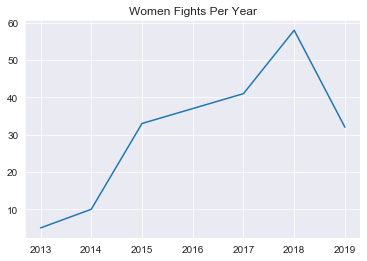

In [14]:
women_indices = (new_data['weight_class'] == "Women's Strawweight") | (new_data['weight_class'] == "Women's Bantamweight") | (new_data['weight_class'] == "Women's Flyweight") | (new_data['weight_class'] == "Women's Featherweight")
women_data = new_data[women_indices]
plt.plot(women_data.groupby(['year']).size())
plt.title("Women Fights Per Year")
plt.show()

In [15]:
# Subset of data before USADA implementation 
before2015 = new_data['year'] < 2015
pre2015data = new_data[before2015]
pre2015data.tail(5)

# Subset of data after USADA implementation
after2015 = new_data['year'] >= 2015
post2015data = new_data[after2015]
post2015data.tail()

,R_fighter,B_fighter,date,location,Winner,title_bout,weight_class,no_of_rounds,B_total_time_fought(seconds),B_current_lose_streak,...,R_current_win_streak,R_longest_win_streak,R_losses,R_Height_cms,R_age,B_avg_BODY_att,B_avg_BODY_landed,B_avg_GROUND_att,B_avg_GROUND_landed,year
2106,Kyoji Horiguchi,Louis Gaudinot,2015-01-03,"Las Vegas, Nevada, USA",Kyoji Horiguchi,False,Flyweight,3,571.250000,2.0,...,3.0,3.0,0.0,165.10,24.0,6.5,4.500000,5.000000,3.0,2015
2107,Hector Lombard,Joshua Burkman,2015-01-03,"Las Vegas, Nevada, USA",No Contest,False,Welterweight,3,667.100000,3.0,...,2.0,2.0,2.0,175.26,36.0,5.7,3.700000,7.000000,5.1,2015
2108,Danny Castillo,Paul Felder,2015-01-03,"Las Vegas, Nevada, USA",Paul Felder,False,Lightweight,3,900.000000,0.0,...,0.0,3.0,4.0,175.26,35.0,4.0,4.000000,37.000000,24.0,2015
2111,Evan Dunham,Rodrigo Damm,2015-01-03,"Las Vegas, Nevada, USA",Evan Dunham,False,Lightweight,3,746.333333,2.0,...,0.0,4.0,6.0,177.80,33.0,9.5,5.333333,0.833333,0.5,2015
2112,Omari Akhmedov,Mats Nilsson,2015-01-03,"Las Vegas, Nevada, USA",Omari Akhmedov,False,Welterweight,3,264.000000,1.0,...,0.0,1.0,1.0,182.88,27.0,5.0,4.000000,0.000000,0.0,2015


In [16]:
# Find the average age pre 2015
avg_age_pre = []
for x in pre2015data.index:
    age_of_fight = pre2015data['R_age'][x] + pre2015data['B_age'][x]
    avg_age_pre.append(age_of_fight / 2)

# Find the average age post 2015
avg_age_post = []
for x in post2015data.index:
    age_of_fight = post2015data['R_age'][x] + post2015data['B_age'][x]
    avg_age_post.append(age_of_fight / 2)


Text(0.5, 1.0, 'Average Age')

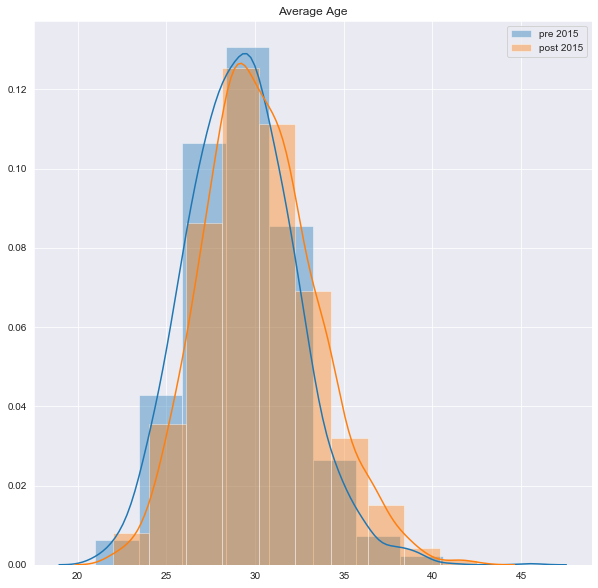

In [17]:
plt.figure(figsize = (10,10))

sns.distplot(avg_age_pre, bins = 10, label = 'pre 2015')
sns.distplot(avg_age_post, bins = 10, label = 'post 2015')
plt.legend()
plt.title("Average Age")

174.17634342186534


Text(0.5, 1.0, 'Distribution of Weight')

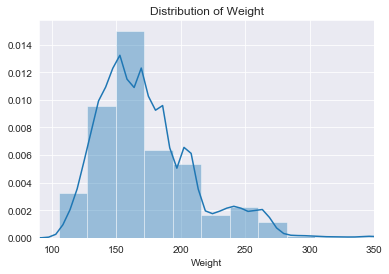

In [18]:
# raw_fighter_data = pd.read_csv("../input/ufcdata/raw_fighter_details.csv")

raw_fighter_data['Weight'] = raw_fighter_data['Weight'].str.strip(' lbs.')
raw_fighter_data['Weight'] = pd.to_numeric(raw_fighter_data['Weight'], errors='coerce')

raw_fighter_data = raw_fighter_data.dropna(subset=['Weight'])
raw_fighter_data['Weight'] = raw_fighter_data['Weight'].astype(int)
raw_fighter_data.dtypes

print(raw_fighter_data['Weight'].mean())

plt.xlim(90,350)
sns.distplot(raw_fighter_data['Weight'], bins=30)
plt.title("Distribution of Weight")

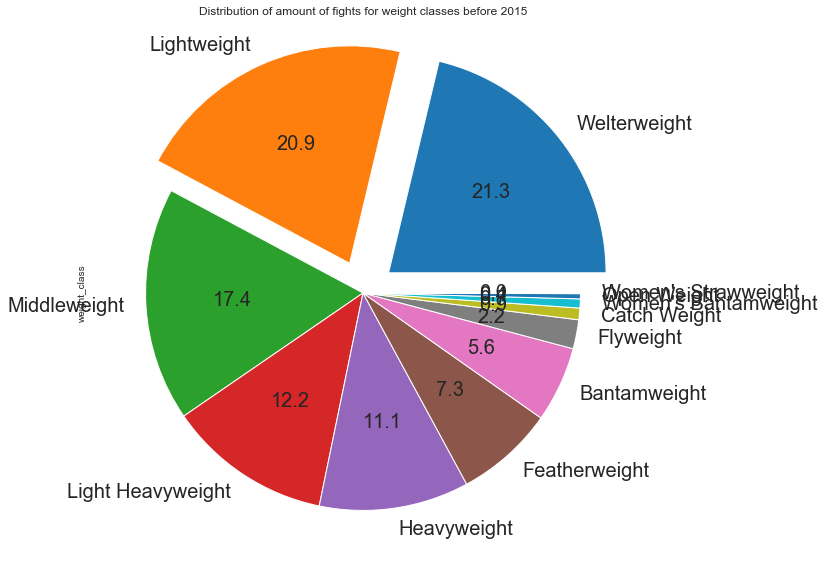

In [19]:
# Graph for Weight Class pre USADA 2015
plot = (pre2015data['weight_class'].value_counts().plot.pie(figsize = (10, 10), autopct='%1.1f', fontsize = 20, explode = (0.15, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)))
plt.title("Distribution of amount of fights for weight classes before 2015")
plt.show(plot)

# This shows that Welterweight & Lightweight make up the majority of fights 

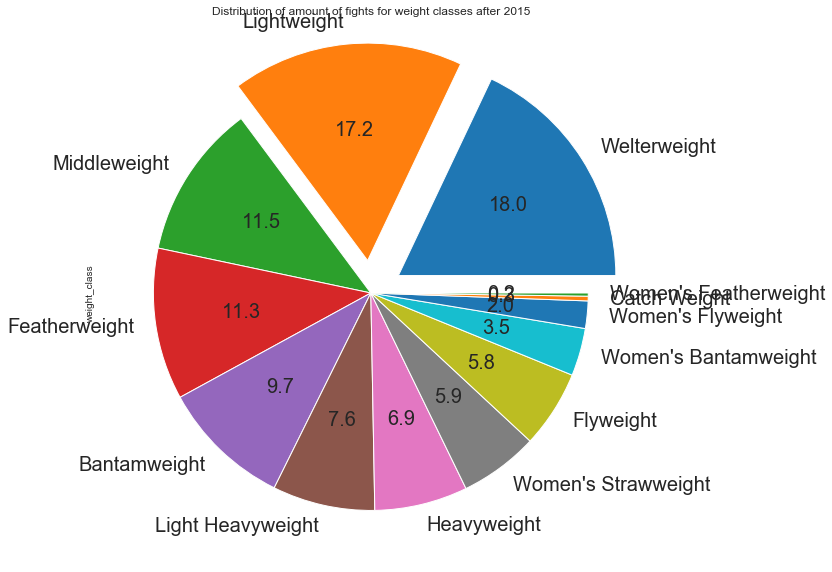

In [20]:
# Graph for Weight Class post USADA 2015
plot = (post2015data['weight_class'].value_counts().plot.pie(figsize = (10,10), autopct='%1.1f', fontsize = 20, explode = (0.15, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)))
plt.title("Distribution of amount of fights for weight classes after 2015")
plt.show(plot)


# Both before and after USADA implementations shows that Lightweight & Welterweight STILL make up majority of fights
# However, all Women's weight classes have increased in the amount of fights since 2015

Text(0.5, 1.0, 'Distribution of title fights for weight classes before 2015')

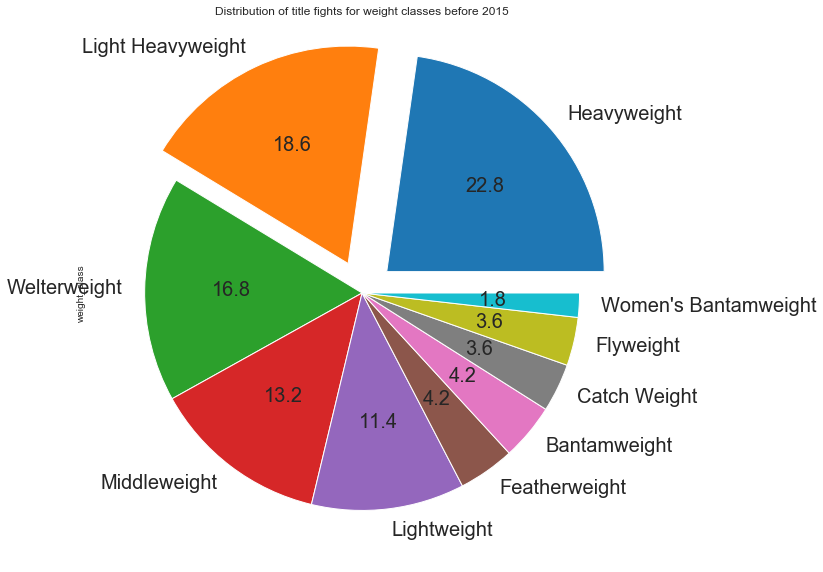

In [21]:
# Graph for pre 2015 USADA implementation Title Fights by weight class distributions
champspre2015 = (pre2015data['title_bout'] == False)
pre2015title = pre2015data[~champspre2015]
plot = pre2015title['weight_class'].value_counts().plot.pie(figsize = (10,10), autopct = '%1.1f', fontsize = 20, explode = (0.15, 0.15, 0, 0, 0, 0, 0, 0, 0, 0))
plt.title("Distribution of title fights for weight classes before 2015")

Text(0.5, 1.0, 'Distribution of title fights for weight classes after 2015')

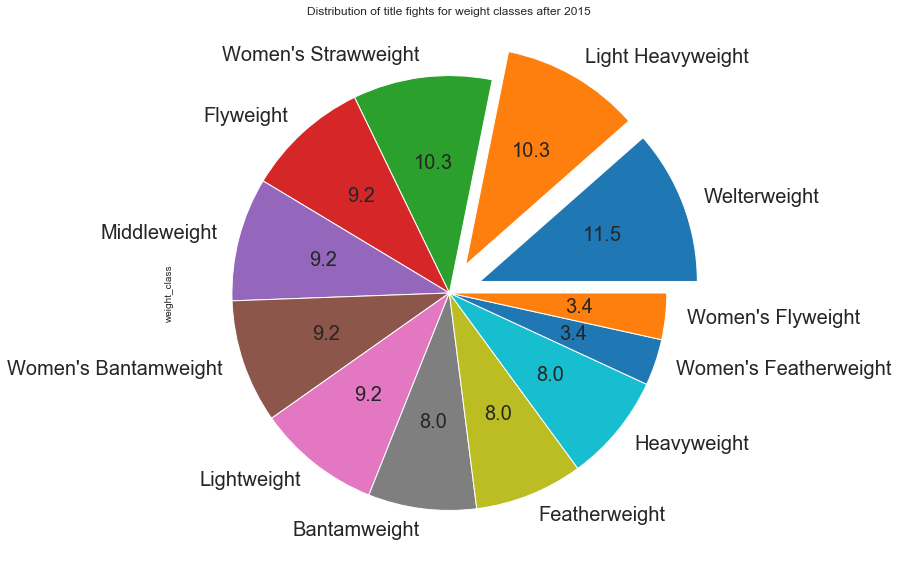

In [22]:
# Graph for post 2015 Title Fights by weight class distributions
champspost2015 = (post2015data['title_bout'] == False)
post2015title = post2015data[~champspost2015]
plot = post2015title['weight_class'].value_counts().plot.pie(figsize = (10,10), autopct = '%1.1f', fontsize = 20, explode = (0.15, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0))
plt.title("Distribution of title fights for weight classes after 2015")

In [23]:
# # using information from the all fights seeing how have Lightweight & Welterweight have changed post 2015 in longest win streaks, lose streaks, age
LightWeight_indices = post2015data['weight_class'] == 'Lightweight'
WelterWeight_indices = post2015data['weight_class'] == 'Welterweight'

LW_data = post2015data[LightWeight_indices]
WW_data = post2015data[WelterWeight_indices]


LightWeight_indices = pre2015data['weight_class'] == 'Lightweight'
WelterWeight_indices = pre2015data['weight_class'] == 'Welterweight'

LW_pre2015data = pre2015data[LightWeight_indices]
WW_pre2015data = pre2015data[WelterWeight_indices]


Text(0.5, 1.0, 'Difference between pre and post 2015 win streaks for Red fighter ')

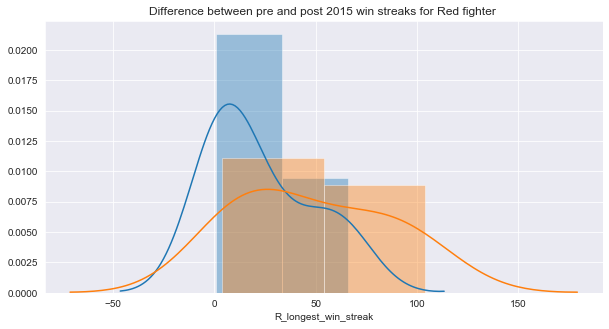

In [24]:
# Comparing Win Streaks for Red & Blue on the Lightweight class
plt.figure(figsize=(10,5))

sns.distplot(LW_data['R_longest_win_streak'].value_counts(), label = 'Lightweight post 2015 for Red Fighter');
sns.distplot(LW_pre2015data['R_longest_win_streak'].value_counts(), label = 'Lightweight pre 2015 for Red Fighter');

plt.title("Difference between pre and post 2015 win streaks for Red fighter ")

Text(0.5, 1.0, 'Difference between pre and post 2015 win streaks for Blue fighter ')

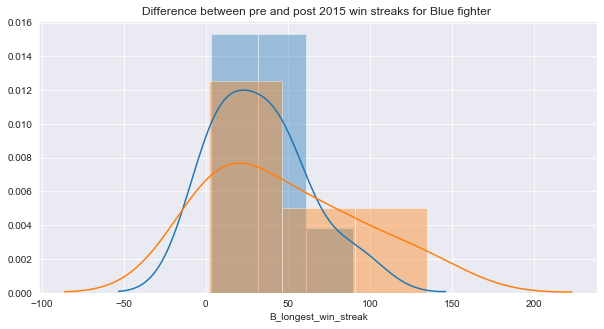

In [25]:
plt.figure(figsize=(10,5))

sns.distplot(LW_data['B_longest_win_streak'].value_counts(), label = 'Lightweight post 2015 for Blue Fighter');
sns.distplot(LW_pre2015data['B_longest_win_streak'].value_counts(), label = 'Lightweight pre 2015 for Blue Fighter');

plt.title("Difference between pre and post 2015 win streaks for Blue fighter ")

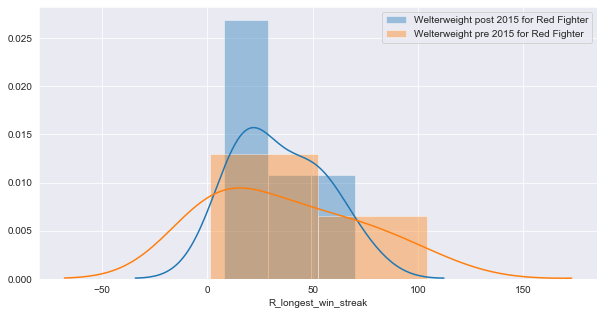

In [26]:
# Comparing Win Streaks for Red & Blue on the Welterweight class
plt.figure(figsize=(10,5))

sns.distplot( WW_data['R_longest_win_streak'].value_counts(), label = 'Welterweight post 2015 for Red Fighter');
sns.distplot( WW_pre2015data['R_longest_win_streak'].value_counts(), label = 'Welterweight pre 2015 for Red Fighter');

plt.legend()

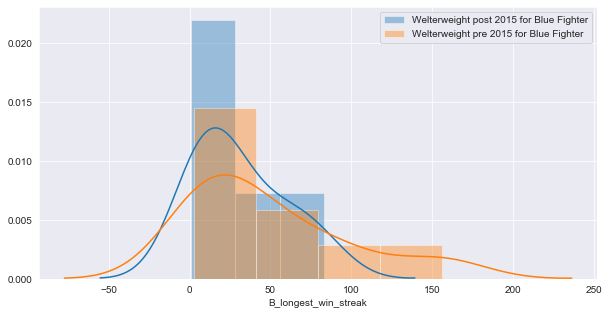

In [27]:
plt.figure(figsize=(10,5))

sns.distplot( WW_data['B_longest_win_streak'].value_counts(), label = 'Welterweight post 2015 for Blue Fighter');
sns.distplot(WW_pre2015data['B_longest_win_streak'].value_counts(), label = 'Welterweight pre 2015 for Blue Fighter');

plt.legend()

70.38896189224704


C:\Users\Home\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Home\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Home\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Home\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


,fighter_name,Height,Weight,Reach,Stance,DOB,HeightInCm
0,AJ Fonseca,"5' 4""",145,NaN,NaN,NaN,64.0
1,AJ Matthews,"5' 11""",185,NaN,NaN,NaN,71.0
2,AJ McKee,"5' 10""",145,NaN,NaN,NaN,70.0
3,AJ Siscoe,"5' 7""",135,NaN,NaN,NaN,67.0
4,Aalon Cruz,"6' 0""",145,NaN,NaN,NaN,72.0


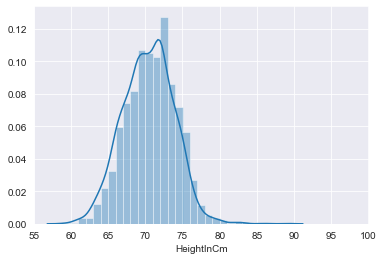

In [28]:
import re
raw_fighter_data['Height'] = raw_fighter_data['Height'].astype(str)
r = re.compile(r"([0-9]+)' ([0-9]*\.?[0-9]+)\"")
def get_inches(el):
    m = r.match(el)
    if m == None:
        return float('NaN')
    else:
        return int(m.group(1))*12 + float(m.group(2))
 
raw_fighter_data['HeightInCm'] = raw_fighter_data['Height'].apply(lambda x:get_inches(x))
 
print(raw_fighter_data['HeightInCm'].mean())
plt.xlim(55,100)
sns.distplot(raw_fighter_data['HeightInCm'], bins=30)
raw_fighter_data.head()

Text(0.5, 1.0, 'Number of body shots attempted, pre and post 2015')

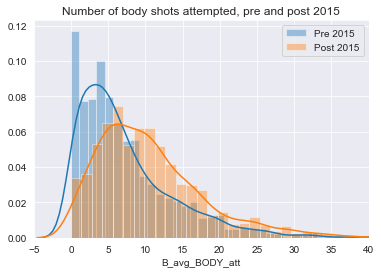

In [29]:
pre2015data = pre2015data.dropna(subset=['B_avg_BODY_att'])
post2015data = post2015data.dropna(subset=['B_avg_BODY_att'])

plt.xlim(-5,40)

sns.distplot(pre2015data['B_avg_BODY_att'], label='Pre 2015')
sns.distplot(post2015data['B_avg_BODY_att'], label='Post 2015')

plt.legend()
plt.title('Number of body shots attempted, pre and post 2015')

Text(0.5, 1.0, 'Number of body shots landed, pre and post 2015')

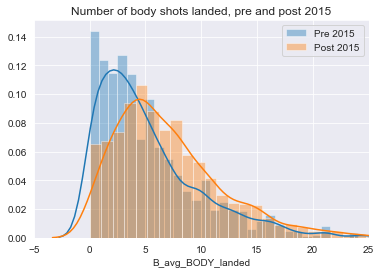

In [30]:
pre2015data = pre2015data.dropna(subset=['B_avg_BODY_landed'])
post2015data = post2015data.dropna(subset=['B_avg_BODY_landed'])

plt.xlim(-5,25)

sns.distplot(pre2015data['B_avg_BODY_landed'], label='Pre 2015')
sns.distplot(post2015data['B_avg_BODY_landed'], label='Post 2015')

plt.legend()
plt.title('Number of body shots landed, pre and post 2015')

Text(0.5, 1.0, 'Number of ground shots attempted, pre and post 2015')

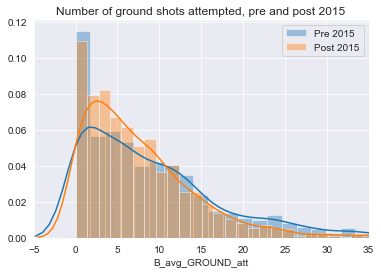

In [31]:
pre2015data = pre2015data.dropna(subset=['B_avg_GROUND_att'])
post2015data = post2015data.dropna(subset=['B_avg_GROUND_att'])

plt.xlim(-5,35)

sns.distplot(pre2015data['B_avg_GROUND_att'], label='Pre 2015')
sns.distplot(post2015data['B_avg_GROUND_att'], label='Post 2015')

plt.legend()
plt.title('Number of ground shots attempted, pre and post 2015')

Text(0.5, 1.0, 'Number of ground shots landed, pre and post 2015')

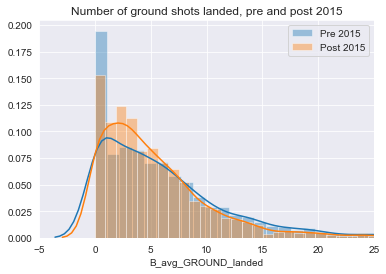

In [32]:
pre2015data = pre2015data.dropna(subset=['B_avg_GROUND_landed'])
post2015data = post2015data.dropna(subset=['B_avg_GROUND_landed'])

plt.xlim(-5,25)

sns.distplot(pre2015data['B_avg_GROUND_landed'], label='Pre 2015')
sns.distplot(post2015data['B_avg_GROUND_landed'], label='Post 2015')

plt.legend()
plt.title('Number of ground shots landed, pre and post 2015')